## Model: Logistic Regression
Attribute Selection: None, using all features

In [8]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,mean_squared_error,r2_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate

def interpret_confusion_matrix(matrix):
    information=[]
    i=0
    for row in matrix:
        total = sum(row)
        correct = row[i]
        
        consider = row.tolist() 
        del consider[i] #remove correctly classified instances

        errors = sum(consider)
        information.append([i,correct,errors,total])
        i+=1
    print(tabulate(information,headers=["Class","Correctly Classified","Incorrectly Classified","Total"]))




In [2]:
df = pd.read_csv("Data/DataEncoded.csv")

X=df.iloc[:,:-1]
y=df["NObeyesdad"]

#### Training, Testing

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
logistic_regression = LogisticRegression(random_state=42,max_iter=1000000).fit(X_train,y_train)

#### Visualization

#### Evaluation

Accuracy: 0.8298969072164949
R squared score: 0.6730956158721554
Mean Squared Error Score: 1.2577319587628866

Confusion Matrix
-----------------


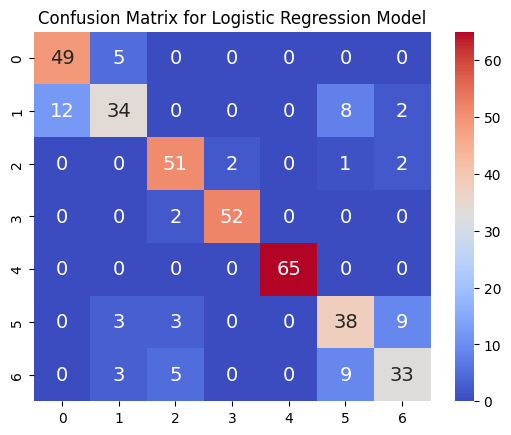

  Class    Correctly Classified    Incorrectly Classified    Total
-------  ----------------------  ------------------------  -------
      0                      49                         5       54
      1                      34                        22       56
      2                      51                         5       56
      3                      52                         2       54
      4                      65                         0       65
      5                      38                        15       53
      6                      33                        17       50


In [12]:
ypred = logistic_regression.predict(X_test)
accuracy = accuracy_score(y_test,ypred)
cf_matrix = confusion_matrix(y_test,ypred)
r_squared = r2_score(y_test,ypred)
mse = mean_squared_error(y_test,ypred)

print("Accuracy: {0}\nR squared score: {1}\nMean Squared Error Score: {2}".format(accuracy,r_squared,mse))

df_cm = pd.DataFrame(cf_matrix, range(7), range(7))
print("\nConfusion Matrix\n-----------------")
sns.heatmap(df_cm, annot=True, annot_kws={"size": 14},cmap = 'coolwarm',) # font size
plt.title("Confusion Matrix for Logistic Regression Model")
plt.show()

interpret_confusion_matrix(cf_matrix)        
